In [1]:
import numpy as np
import tifffile as tif
import matplotlib.pyplot as plt

In [3]:
bs_data = tif.imread('/mnt/c/Users/ankit/Desktop/Msc AIML/Data/breast-cancer/trainingData.tiff')
bs_data.shape

(300, 378, 428)

In [5]:
cov_data = tif.imread('/mnt/c/Users/ankit/Desktop/Msc AIML/Data/convallaria/trainingData.tif')
cov_data.shape

(1536, 512, 512)

In [6]:
cov_data_GT = tif.imread('/mnt/c/Users/ankit/Desktop/Msc AIML/Data/convallaria/trainingDataGT.tif')
cov_data_GT.shape

(1536, 512, 512)

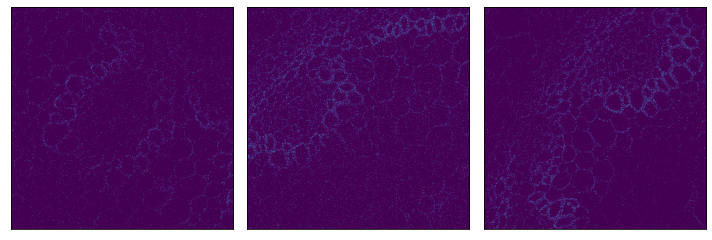

In [15]:
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(cov_data[511 * (i + 1)])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()


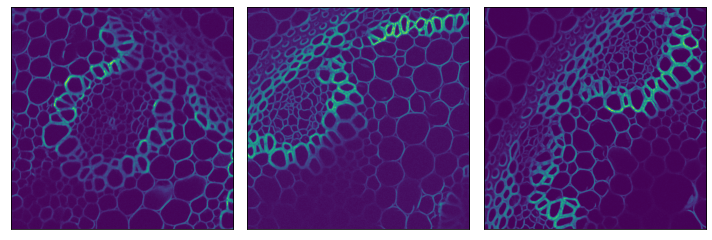

In [16]:
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(cov_data_GT[511 * (i + 1)])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()


In [19]:
len(np.unique(cov_data_GT[:100], axis = 0)), len(np.unique(cov_data[:100], axis = 0))

(1, 100)

In [22]:
np.unique(np.sum(cov_data[:512], axis = 0) == cov_data_GT[0])

array([ True])

([], [])

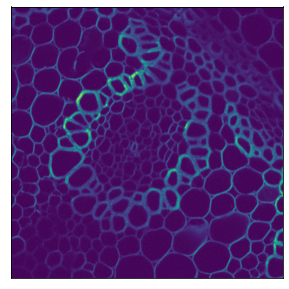

In [24]:
plt.figure(figsize=(5, 5))
plt.imshow(np.sum(cov_data[:512], axis = 0))
plt.xticks([])
plt.yticks([])

In [67]:
import torch

folder_path = '/mnt/c/Users/ankit/Desktop/Msc AIML/Data/idr0076-ali-metabric/20191219-ftp/METABRIC_IMC/to_public_repository/full_stacks/'
output_path = '/mnt/c/Users/ankit/Desktop/Msc AIML/Data/breast-cancer/trainingData.tiff'

since our data have different dimensions we can try creating a custom collate function that can be fed to the dataloader

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

# a simple custom collate function, just to show the idea
def my_collate(batch):
    data = [item[0] for item in batch]
    target = [item[1] for item in batch]
    target = torch.LongTensor(target)
    return [data, target]


def show_image_batch(img_list, title=None):
    num = len(img_list)
    fig = plt.figure()
    for i in range(num):
        ax = fig.add_subplot(1, num, i+1)
        ax.imshow(img_list[i].numpy().transpose([1,2,0]))
        ax.set_title(title[i])

    plt.show()

#  do not do randomCrop to show that the custom collate_fn can handle images of different size
train_transforms = transforms.Compose([transforms.Scale(size = 224),
                                       transforms.ToTensor(),
                                       ])

# change root to valid dir in your system, see ImageFolder documentation for more info
train_dataset = datasets.ImageFolder(root="/hd1/jdhao/toyset",
                                     transform=train_transforms)

trainset = DataLoader(dataset=train_dataset,
                      batch_size=4,
                      shuffle=True,
                      collate_fn=my_collate, # use custom collate function here
                      pin_memory=True)

trainiter = iter(trainset)
imgs, labels = trainiter.next()

# print(type(imgs), type(labels))
show_image_batch(imgs, title=[train_dataset.classes[x] for x in labels])

In [77]:
import os
data_paths = [folder_path + f for f in os.listdir(folder_path) if f.endswith('.tiff')]

In [80]:
data_paths[0]

'/mnt/c/Users/ankit/Desktop/Msc AIML/Data/idr0076-ali-metabric/20191219-ftp/METABRIC_IMC/to_public_repository/full_stacks/MB0000_1_527_fullstack.tiff'